In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_csv('C:/Pythondatasets/dataset_aqi_daily.csv', parse_dates=True, index_col='DateTime')
data

,AQI
DateTime,
2018-05-22,58.000000
2018-05-23,55.000000
2018-05-24,47.958333
2018-05-25,65.125000
2018-05-26,72.750000
...,...
2023-05-06,48.500000
2023-05-07,41.375000
2023-05-08,44.521739


In [16]:
series = data['AQI'].squeeze()
series

DateTime
2018-05-22    58.000000
2018-05-23    55.000000
2018-05-24    47.958333
2018-05-25    65.125000
2018-05-26    72.750000
                ...    
2023-05-06    48.500000
2023-05-07    41.375000
2023-05-08    44.521739
2023-05-09    29.083333
2023-05-10    49.000000
Name: AQI, Length: 1815, dtype: float64

## All train data taken into account, prediction of test data

In [17]:
X = series
size = int(len(X)* 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [18]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=58.334163, expected=61.250000
predicted=63.390152, expected=61.791667
predicted=62.732855, expected=54.958333
predicted=57.609740, expected=51.250000
predicted=56.001852, expected=51.500000
predicted=56.589396, expected=52.083333
predicted=56.678544, expected=34.500000
predicted=43.088798, expected=46.250000
predicted=54.478182, expected=57.041667
predicted=59.865168, expected=54.416667
predicted=55.895722, expected=60.791667
predicted=61.280195, expected=56.291667
predicted=56.942244, expected=59.291667
predicted=60.203794, expected=58.826087
predicted=59.461366, expected=76.250000
predicted=72.840387, expected=56.083333
predicted=55.087653, expected=37.333333
predicted=44.965871, expected=55.500000
predicted=61.482748, expected=48.416667
predicted=52.463105, expected=58.541667
predicted=61.191631, expected=64.041667
predicted=63.462538, expected=68.958333
predicted=66.466332, expected=72.333333
predicted=68.606357, expected=66.416667
predicted=64.149783, expected=60.500000


predicted=128.631472, expected=184.500000
predicted=166.027445, expected=101.791667
predicted=96.268665, expected=132.291667
predicted=133.561485, expected=106.458333
predicted=108.533868, expected=152.833333
predicted=147.005608, expected=125.208333
predicted=118.737111, expected=96.875000
predicted=102.616690, expected=53.833333
predicted=74.381160, expected=56.208333
predicted=81.094627, expected=84.916667
predicted=99.382031, expected=139.833333
predicted=133.864408, expected=181.916667
predicted=156.357747, expected=205.478261
predicted=169.215306, expected=53.041667
predicted=54.256860, expected=64.666667
predicted=89.109261, expected=101.000000
predicted=111.464399, expected=114.000000
predicted=113.535390, expected=181.708333
predicted=161.624964, expected=202.708333
predicted=167.342256, expected=229.375000
predicted=187.101532, expected=260.958333
predicted=210.390061, expected=210.875000
predicted=171.899773, expected=164.541667
predicted=149.079259, expected=155.833333
pred

In [33]:
one_day_forecast = model_fit.forecast(steps=1)
one_day_forecast

array([37.753327])

In [34]:
# Example: Forecast 7 days ahead
seven_days_forecast = model_fit.forecast(steps=7)

# Example: Forecast 2 weeks (14 days) ahead
two_weeks_forecast = model_fit.forecast(steps=14)

# Example: Forecast 4 weeks (28 days) ahead
four_weeks_forecast = model_fit.forecast(steps=28)

In [35]:
seven_days_forecast

array([37.753327  , 46.32161892, 50.86415503, 52.7401343 , 53.49767573,
       53.94416208, 54.36305511])

In [28]:
predictions

[58.33416253308731,
 63.39015163534995,
 62.732855250265885,
 57.609740264046984,
 56.00185206919271,
 56.58939569891004,
 56.67854356559409,
 43.08879763393358,
 54.47818157654866,
 59.86516751180843,
 55.89572160695401,
 61.28019509071112,
 56.942243629854204,
 60.20379388895267,
 59.461365813898055,
 72.84038685709291,
 55.087652577565805,
 44.96587072932901,
 61.48274813460977,
 52.46310494261566,
 61.19163130215823,
 63.462537630351186,
 66.4663321893166,
 68.606356905654,
 64.14978274405351,
 61.216269158463575,
 64.98955918171336,
 57.714558807896644,
 39.683713039770126,
 57.30808820280517,
 54.87775554196628,
 66.54290122100139,
 61.328517759840615,
 51.675540416198864,
 57.42209956773226,
 56.22926557095133,
 60.98100530915589,
 50.088824943245925,
 51.43718124901099,
 50.974508230038296,
 62.08616960715572,
 72.15615524561821,
 61.3203439810868,
 61.013576503012146,
 66.79802248300759,
 47.23519237542028,
 62.00340907346177,
 74.02244871820912,
 60.81845217182777,
 66.662957

Test RMSE: 26.556
Test MAE: 18.169
SMAPE: 22.23


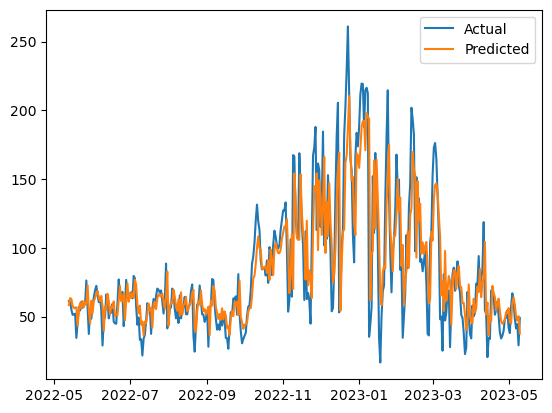

In [32]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(test, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(test, predictions)
print(f'SMAPE: {smape_value:.2f}')

# Plot the actual vs. predicted values
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

## All train data taken into account, prediction of 1 day (the last day in dataset)

In [85]:
trainAll1, testAll1 = X[0:len(X)-1], X[len(X)-1:len(X)]
history = [x for x in trainAll1]
predictions = list()

In [86]:
# walk-forward validation
for t in range(len(testAll1)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testAll1[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=37.753327, expected=49.000000


In [87]:
rmse = sqrt(mean_squared_error(testAll1, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testAll1, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testAll1, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 11.247
Test MAE: 11.247
SMAPE: 25.93


## All train data taken into account, prediction of last 7 days in dataset

In [82]:
trainAll7, testAll7 = X[0:len(X)-7], X[len(X)-7:len(X)]
history = [x for x in trainAll7]
predictions = list()

In [83]:
# walk-forward validation
for t in range(len(testAll7)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testAll7[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=59.615597, expected=66.916667
predicted=63.872532, expected=61.583333
predicted=58.733593, expected=48.500000
predicted=50.173375, expected=41.375000
predicted=46.994047, expected=44.521739
predicted=50.267282, expected=29.083333
predicted=37.753327, expected=49.000000


In [84]:
rmse = sqrt(mean_squared_error(testAll7, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testAll7, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testAll7, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 10.837
Test MAE: 9.075
SMAPE: 19.75


## All train data taken into account, prediction of last 2 weeks in dataset 

In [79]:
trainAll14, testAll14 = X[0:len(X)-14], X[len(X)-14:len(X)]
history = [x for x in trainAll14]
predictions = list()

In [80]:
# walk-forward validation
for t in range(len(testAll14)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testAll14[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=46.144435, expected=39.625000
predicted=47.875200, expected=48.208333
predicted=53.267455, expected=49.208333
predicted=52.387613, expected=54.375000
predicted=56.084411, expected=41.833333
predicted=45.805805, expected=38.000000
predicted=44.838308, expected=57.166667
predicted=59.615597, expected=66.916667
predicted=63.872532, expected=61.583333
predicted=58.733593, expected=48.500000
predicted=50.173375, expected=41.375000
predicted=46.994047, expected=44.521739
predicted=50.267282, expected=29.083333
predicted=37.753327, expected=49.000000


In [81]:
rmse = sqrt(mean_squared_error(testAll14, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testAll14, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testAll14, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 9.640
Test MAE: 7.915
SMAPE: 16.98


## All train data taken into account, prediction of last 4 weeks in dataset

In [76]:
trainAll28, testAll28 = X[0:len(X)-28], X[len(X)-28:len(X)]
history = [x for x in trainAll28]
predictions = list()

In [77]:
# walk-forward validation
for t in range(len(testAll28)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testAll28[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=51.430574, expected=51.750000
predicted=60.205182, expected=20.450000
predicted=36.299236, expected=34.375000
predicted=50.700420, expected=33.750000
predicted=46.616735, expected=68.875000
predicted=72.353308, expected=69.750000
predicted=67.114028, expected=65.478261
predicted=64.148667, expected=51.333333
predicted=54.425572, expected=54.750000
predicted=59.231935, expected=60.791667
predicted=63.018526, expected=50.416667
predicted=54.141812, expected=38.500000
predicted=46.662326, expected=34.083333
predicted=44.725532, expected=36.000000
predicted=46.144435, expected=39.625000
predicted=47.875200, expected=48.208333
predicted=53.267455, expected=49.208333
predicted=52.387613, expected=54.375000
predicted=56.084411, expected=41.833333
predicted=45.805805, expected=38.000000
predicted=44.838308, expected=57.166667
predicted=59.615597, expected=66.916667
predicted=63.872532, expected=61.583333
predicted=58.733593, expected=48.500000
predicted=50.173375, expected=41.375000


In [78]:
rmse = sqrt(mean_squared_error(testAll28, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testAll28, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testAll28, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 12.652
Test MAE: 9.304
SMAPE: 20.05


## 1 year train data taken into account (last 365 days), prediction of last day in dataset

In [65]:
train1Year1Day, test1Year1Day = X[len(X)-365:len(X)-1], X[len(X)-1:len(X)]
history = [x for x in train1Year1Day]
predictions = list()

In [70]:
# walk-forward validation
for t in range(len(test1Year1Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test1Year1Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=58.913292, expected=49.000000


In [67]:
X

DateTime
2018-05-22    58.000000
2018-05-23    55.000000
2018-05-24    47.958333
2018-05-25    65.125000
2018-05-26    72.750000
                ...    
2023-05-06    48.500000
2023-05-07    41.375000
2023-05-08    44.521739
2023-05-09    29.083333
2023-05-10    49.000000
Name: AQI, Length: 1815, dtype: float64

In [71]:
train1Year1Day

DateTime
2022-05-11    59.541667
2022-05-12    55.416667
2022-05-13    61.250000
2022-05-14    61.791667
2022-05-15    54.958333
                ...    
2023-05-05    61.583333
2023-05-06    48.500000
2023-05-07    41.375000
2023-05-08    44.521739
2023-05-09    29.083333
Name: AQI, Length: 364, dtype: float64

## 1 year train data taken into account (last 365 days), prediction of last 7 days in dataset

In [89]:
train1Year7Day, test1Year7Day = X[len(X)-365:len(X)-7], X[len(X)-7:len(X)]
history = [x for x in train1Year7Day]
predictions = list()

# walk-forward validation
for t in range(len(test1Year7Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test1Year7Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=63.806775, expected=66.916667
predicted=71.598111, expected=61.583333
predicted=65.363211, expected=48.500000
predicted=53.888168, expected=41.375000
predicted=48.135530, expected=44.521739
predicted=51.988700, expected=29.083333
predicted=38.744558, expected=49.000000


In [91]:
rmse = sqrt(mean_squared_error(test1Year7Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(test1Year7Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(test1Year7Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 13.059
Test MAE: 11.325
SMAPE: 23.34


## 1 year train data taken into account (last 365 days), prediction of last 2 weeks in dataset

In [92]:
train1Year14Day, test1Year14Day = X[len(X)-365:len(X)-14], X[len(X)-14:len(X)]
history = [x for x in train1Year7Day]
predictions = list()

# walk-forward validation
for t in range(len(test1Year14Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test1Year14Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=63.806775, expected=39.625000
predicted=48.053103, expected=48.208333
predicted=52.809312, expected=49.208333
predicted=58.274160, expected=54.375000
predicted=57.823358, expected=41.833333
predicted=51.042409, expected=38.000000
predicted=43.270327, expected=57.166667
predicted=64.820976, expected=66.916667
predicted=70.348064, expected=61.583333
predicted=66.041905, expected=48.500000
predicted=53.160646, expected=41.375000
predicted=48.509825, expected=44.521739
predicted=51.321596, expected=29.083333
predicted=38.772106, expected=49.000000


In [93]:
rmse = sqrt(mean_squared_error(test1Year14Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(test1Year14Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(test1Year14Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 13.024
Test MAE: 10.815
SMAPE: 22.10


## 1 year train data taken into account (last 365 days), prediction of last 4 weeks in dataset

In [94]:
train1Year28Day, test1Year28Day = X[len(X)-365:len(X)-28], X[len(X)-28:len(X)]
history = [x for x in train1Year28Day]
predictions = list()

# walk-forward validation
for t in range(len(test1Year28Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test1Year28Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=62.060557, expected=51.750000
predicted=49.042561, expected=20.450000
predicted=38.790840, expected=34.375000
predicted=36.070774, expected=33.750000
predicted=52.055711, expected=68.875000
predicted=66.832141, expected=69.750000
predicted=81.457206, expected=65.478261
predicted=62.020959, expected=51.333333
predicted=62.425210, expected=54.750000
predicted=55.168840, expected=60.791667
predicted=70.490262, expected=50.416667
predicted=53.112964, expected=38.500000
predicted=48.448731, expected=34.083333
predicted=40.954325, expected=36.000000
predicted=46.985527, expected=39.625000
predicted=47.224411, expected=48.208333
predicted=56.598329, expected=49.208333
predicted=55.657401, expected=54.375000
predicted=60.487177, expected=41.833333
predicted=49.449176, expected=38.000000
predicted=45.025258, expected=57.166667
predicted=63.806775, expected=66.916667
predicted=71.598111, expected=61.583333
predicted=65.363211, expected=48.500000
predicted=53.888168, expected=41.375000


In [95]:
rmse = sqrt(mean_squared_error(test1Year28Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(test1Year28Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(test1Year28Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 12.648
Test MAE: 10.639
SMAPE: 21.88


## Half year train data taken into account (last 183 days), prediction of last day in dataset

In [97]:
trainHalfYear1Day, testHalfYear1Day = X[len(X)-183:len(X)-1], X[len(X)-1:len(X)]
history = [x for x in trainHalfYear1Day]
predictions = list()

# walk-forward validation
for t in range(len(testHalfYear1Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testHalfYear1Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=45.342512, expected=49.000000


In [98]:
rmse = sqrt(mean_squared_error(testHalfYear1Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testHalfYear1Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testHalfYear1Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 3.657
Test MAE: 3.657
SMAPE: 7.75


## Half year train data taken into account (last 183 days), prediction of last 7 days in dataset

In [99]:
trainHalfYear7Day, testHalfYear7Day = X[len(X)-183:len(X)-7], X[len(X)-7:len(X)]
history = [x for x in trainHalfYear7Day]
predictions = list()

# walk-forward validation
for t in range(len(testHalfYear7Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testHalfYear7Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=72.402742, expected=66.916667
predicted=78.896241, expected=61.583333
predicted=71.419257, expected=48.500000
predicted=59.683279, expected=41.375000
predicted=54.430510, expected=44.521739
predicted=58.949672, expected=29.083333
predicted=45.342512, expected=49.000000


In [100]:
rmse = sqrt(mean_squared_error(testHalfYear7Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testHalfYear7Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testHalfYear7Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 17.703
Test MAE: 15.351
SMAPE: 28.95


## Half year train data taken into account (last 183 days), prediction of last 2 weeks in dataset

In [101]:
trainHalfYear14Day, testHalfYear14Day = X[len(X)-183:len(X)-14], X[len(X)-14:len(X)]
history = [x for x in trainHalfYear14Day]
predictions = list()

# walk-forward validation
for t in range(len(testHalfYear14Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testHalfYear14Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=55.631039, expected=39.625000
predicted=56.864976, expected=48.208333
predicted=64.913389, expected=49.208333
predicted=64.244241, expected=54.375000
predicted=67.621295, expected=41.833333
predicted=57.071373, expected=38.000000
predicted=51.753750, expected=57.166667
predicted=72.402742, expected=66.916667
predicted=78.896241, expected=61.583333
predicted=71.419257, expected=48.500000
predicted=59.683279, expected=41.375000
predicted=54.430510, expected=44.521739
predicted=58.949672, expected=29.083333
predicted=45.342512, expected=49.000000


In [102]:
rmse = sqrt(mean_squared_error(testHalfYear14Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testHalfYear14Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testHalfYear14Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 16.748
Test MAE: 14.855
SMAPE: 28.15


## Half year train data taken into account (last 183 days), prediction of last 4 weeks in dataset

In [103]:
trainHalfYear28Day, testHalfYear28Day = X[len(X)-183:len(X)-28], X[len(X)-28:len(X)]
history = [x for x in trainHalfYear28Day]
predictions = list()

# walk-forward validation
for t in range(len(testHalfYear28Day)):
 model = ARIMA(history, order=(3,0,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = testHalfYear28Day[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=69.395515, expected=51.750000
predicted=54.940055, expected=20.450000
predicted=51.972498, expected=34.375000
predicted=45.928124, expected=33.750000
predicted=65.638128, expected=68.875000
predicted=76.899498, expected=69.750000
predicted=91.766737, expected=65.478261
predicted=69.076790, expected=51.333333
predicted=70.553559, expected=54.750000
predicted=63.955132, expected=60.791667
predicted=79.261961, expected=50.416667
predicted=61.875866, expected=38.500000
predicted=55.982695, expected=34.083333
predicted=50.684163, expected=36.000000
predicted=55.631039, expected=39.625000
predicted=56.864976, expected=48.208333
predicted=64.913389, expected=49.208333
predicted=64.244241, expected=54.375000
predicted=67.621295, expected=41.833333
predicted=57.071373, expected=38.000000
predicted=51.753750, expected=57.166667
predicted=72.402742, expected=66.916667
predicted=78.896241, expected=61.583333
predicted=71.419257, expected=48.500000
predicted=59.683279, expected=41.375000


In [104]:
rmse = sqrt(mean_squared_error(testHalfYear28Day, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mean_absolute_error(testHalfYear28Day, predictions))

def smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

smape_value = smape(testHalfYear28Day, predictions)
print(f'SMAPE: {smape_value:.2f}')

Test RMSE: 18.212
Test MAE: 16.145
SMAPE: 30.98
